In [97]:
# https://www.youtube.com/watch?v=vtm35gVP8JU
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [98]:
# Loading train as well as test data in two different DataFrames
df = pd.read_csv(r'D:\Downloads\_Tanni_Data\Tanni Project\Proj_2022_03_05\train.csv')
df_t = pd.read_csv(r'D:\Downloads\_Tanni_Data\Tanni Project\Proj_2022_03_05\test.csv')

In [244]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [141]:
# Object type columns when converted to numerical type result in a number columns equal to no of unique values in that column
# Finding differenct in resultant object type columns unique value columns (that will be made when we conver to numerical)
# 
for i in df_t.columns:
    if df_t[i].dtype == object:
        if( len(df_t[i].unique()) != len(df[i].unique())) :
            print(i,":", df_t[i].unique(), df[i].unique())

MSZoning : ['RL' 'RM' 'FV' 'C (all)'] ['RL' 'RM' 'FV' 'RH' 'C (all)']
Utilities : ['AllPub' 'NoSeWa'] ['AllPub']
Neighborhood : ['StoneBr' 'CollgCr' 'Crawfor' 'Somerst' 'MeadowV' 'Edwards' 'NridgHt'
 'SawyerW' 'Mitchel' 'BrkSide' 'NAmes' 'Timber' 'OldTown' 'Sawyer'
 'IDOTRR' 'SWISU' 'Gilbert' 'NWAmes' 'BrDale' 'NPkVill' 'NoRidge'
 'Blmngtn' 'Veenker' 'ClearCr'] ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'PosN' 'RRAn' 'PosA'] ['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Condition2 : ['Norm' 'RRNn'] ['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
RoofStyle : ['Hip' 'Gable' 'Gambrel' 'Mansard' 'Flat'] ['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
RoofMatl : ['CompShg' 'WdShake' 'Tar&Grv'] ['CompShg'

#### Above display shows that the no of unique values is different for many object type columns<br>
Hence we will club both the train as well as test dataframe together for preprocessing of data before model building.

In [142]:
dfn = df.append(df_t,ignore_index=True)                  # Add both DataFrames to make a single DataFrame

In [143]:
# dfn1 = dfn.drop(dfn[pd.isna(dfn.SalePrice)].index)     # Make train data by deleteing NaN SalePrice 

In [144]:
# dfn1_t = dfn.drop(dfn[pd.notna(dfn.SalePrice)].index)  # Make test data by deleting non NaN SalePrice

In [145]:
# print(df.shape, df_t.shape, dfn.shape, dfn1.shape, dfn1_t.shape)

In [146]:
dfn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
1456,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
1457,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
1458,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


In [147]:
def print_nulls(p_df):
    newdict = {} #[]
    print ('No of Rows:', p_df.shape[0],' Columns:',p_df.shape[1])
    for i in p_df.columns:
        if p_df[i].isnull().sum() > 0:
            newdict[i] = p_df[i].isnull().sum()
    dic2=dict(sorted(newdict.items(),key = lambda x:x[1],reverse=True))
    print('{:15s} {:8s} {:5s}'.format('---------------','------','--------','-----'))
    print('{:15s} {:8s} {:5s}'.format('COLUMN_NAME','  TYPE','   NULLS','  %'))
    print('{:15s} {:8s} {:5s}'.format('---------------','------','--------','-----'))
    for i in dic2.items():
        print('{:15s} {:8d} {:5.2f}'.format(i[0], i[1], np.round(i[1]*100/p_df.shape[0],2)))

In [148]:
# This will convert a categorical column into numerical multiple columns
# and drop the original column
def categorical_to_numerical(p_df, p_field):
    df1 = pd.get_dummies(p_df[p_field], drop_first=True)
    df2 = p_df.drop([p_field], axis=1)
    df2 = pd.concat([df2,df1], axis=1)
    return df2

In [149]:
# This will replace NaN values in a column with the mean of the column
def replace_nulls_with_mean(p_df, p_field):
    p_df[p_field]= p_df[p_field].fillna(p_df[p_field].mean())
    return p_df

In [150]:
# This will replace NaN values in the column with the median of the column
def replace_nulls_with_median(p_df, p_field):
    p_df[p_field]= p_df[p_field].fillna(p_df[p_field].median())
    return p_df

In [151]:
# This will replace NaN values in the column with the mode of the column
def replace_nulls_with_mode(p_df, p_field):
    p_df[p_field]= p_df[p_field].fillna(p_df[p_field].mode()[0])
    return p_df

In [152]:
# This will replace NaN values in the column with the given value 'p_value'
def replace_nulls_with_value(p_df, p_field, p_value):
    p_df[p_field]= p_df[p_field].fillna(p_value)
    return p_df

In [153]:
print_nulls(dfn)

No of Rows: 1460  Columns: 81
--------------- ------   --------
COLUMN_NAME       TYPE      NULLS
--------------- ------   --------
PoolQC              1453 99.52
MiscFeature         1406 96.30
Alley               1369 93.77
Fence               1179 80.75
FireplaceQu          690 47.26
SalePrice            292 20.00
LotFrontage          259 17.74
GarageType            81  5.55
GarageYrBlt           81  5.55
GarageFinish          81  5.55
GarageQual            81  5.55
GarageCond            81  5.55
BsmtExposure          38  2.60
BsmtFinType2          38  2.60
BsmtQual              37  2.53
BsmtCond              37  2.53
BsmtFinType1          37  2.53
MasVnrType             8  0.55
MasVnrArea             8  0.55
Electrical             1  0.07


In [154]:
# PoolQC              1453 99.52
# MiscFeature         1406 96.30
# Alley               1369 93.77
# Fence               1179 80.75
# Hence we need to drop PoolQC,MiscFeature,Alley,Fence
dfn.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [155]:
#dfn['FireplaceQu'].value_counts()
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:xlabel='LotFrontage'>

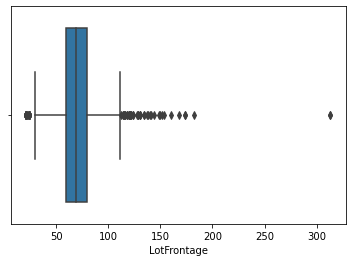

In [156]:
# Let's examine LotFrontage (float64)
import seaborn as sns
sns.boxplot(dfn.LotFrontage)

In [157]:
# data is skewed with outliers too. it's type is float64
# We'll use mode for filling null values
dfn=replace_nulls_with_mode(dfn, 'LotFrontage')

In [158]:
print_nulls(dfn)

No of Rows: 1460  Columns: 77
--------------- ------   --------
COLUMN_NAME       TYPE      NULLS
--------------- ------   --------
FireplaceQu          690 47.26
SalePrice            292 20.00
GarageType            81  5.55
GarageYrBlt           81  5.55
GarageFinish          81  5.55
GarageQual            81  5.55
GarageCond            81  5.55
BsmtExposure          38  2.60
BsmtFinType2          38  2.60
BsmtQual              37  2.53
BsmtCond              37  2.53
BsmtFinType1          37  2.53
MasVnrType             8  0.55
MasVnrArea             8  0.55
Electrical             1  0.07


In [159]:
dfn['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [160]:
# From the data description we see that NA: No Fireplace can be put in place of missing values
dfn = replace_nulls_with_value(dfn,'FireplaceQu','NA')

In [161]:
print_nulls(dfn)

No of Rows: 1460  Columns: 77
--------------- ------   --------
COLUMN_NAME       TYPE      NULLS
--------------- ------   --------
SalePrice            292 20.00
GarageType            81  5.55
GarageYrBlt           81  5.55
GarageFinish          81  5.55
GarageQual            81  5.55
GarageCond            81  5.55
BsmtExposure          38  2.60
BsmtFinType2          38  2.60
BsmtQual              37  2.53
BsmtCond              37  2.53
BsmtFinType1          37  2.53
MasVnrType             8  0.55
MasVnrArea             8  0.55
Electrical             1  0.07


In [162]:
dfn['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [163]:
# For GarageType type we can replace NA: No Garage
dfn = replace_nulls_with_value(dfn,'GarageType','NA')

In [164]:
print_nulls(dfn)

No of Rows: 1460  Columns: 77
--------------- ------   --------
COLUMN_NAME       TYPE      NULLS
--------------- ------   --------
SalePrice            292 20.00
GarageYrBlt           81  5.55
GarageFinish          81  5.55
GarageQual            81  5.55
GarageCond            81  5.55
BsmtExposure          38  2.60
BsmtFinType2          38  2.60
BsmtQual              37  2.53
BsmtCond              37  2.53
BsmtFinType1          37  2.53
MasVnrType             8  0.55
MasVnrArea             8  0.55
Electrical             1  0.07


In [165]:
dfn['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1900.0     1
1908.0     1
1933.0     1
1906.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<AxesSubplot:xlabel='GarageYrBlt'>

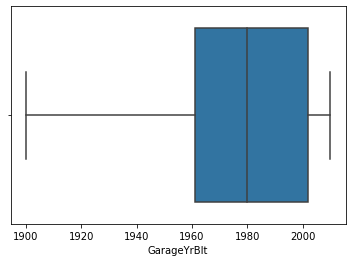

In [166]:
import seaborn as sns
sns.boxplot(dfn.GarageYrBlt)

In [167]:
print('Mean:',dfn['GarageYrBlt'].mean(),'  Median:',dfn['GarageYrBlt'].median(),'  Mode:',dfn['GarageYrBlt'].mode()[0])

Mean: 1978.5061638868744   Median: 1980.0   Mode: 2005.0


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

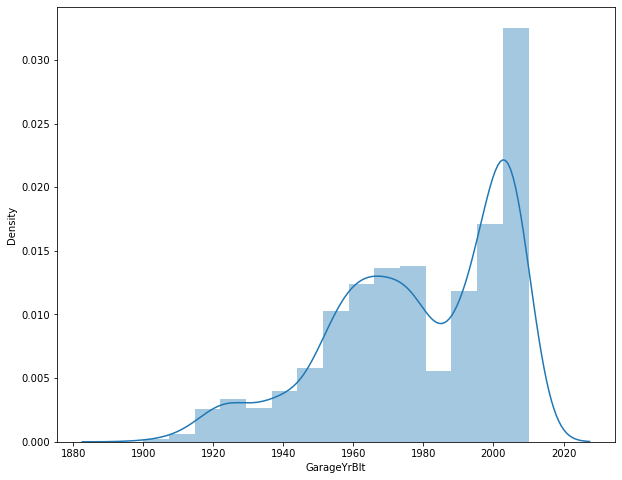

In [168]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(dfn.GarageYrBlt)

In [169]:
# for GarageYrBlt
dfn[['YearBuilt','GarageYrBlt']][pd.isna(dfn['GarageYrBlt'])]

,YearBuilt,GarageYrBlt
48,1946,NaN
72,1935,NaN
74,1931,NaN
105,1971,NaN
116,2004,NaN
...,...,...
1382,1922,NaN
1383,1872,NaN
1385,1955,NaN
1386,1994,NaN


In [186]:
# GarageYrBlt has 81 null values. It'll be OK to replace GarageYrBlt with the YearBuilt for NaN values.
for i in range(0,len(dfn['GarageYrBlt'])):
    if np.isnan(dfn['GarageYrBlt'][i]):
        dfn['GarageYrBlt'][i]= dfn['YearBuilt'][i]

In [187]:
print_nulls(dfn)

No of Rows: 1460  Columns: 77
--------------- ------   --------
COLUMN_NAME       TYPE      NULLS
--------------- ------   --------
SalePrice            292 20.00
GarageFinish          81  5.55
GarageQual            81  5.55
GarageCond            81  5.55
BsmtExposure          38  2.60
BsmtFinType2          38  2.60
BsmtQual              37  2.53
BsmtCond              37  2.53
BsmtFinType1          37  2.53
MasVnrType             8  0.55
MasVnrArea             8  0.55
Electrical             1  0.07


In [40]:
# dfx = dfn[['GarageFinish','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']][pd.isna(dfn['GarageYrBlt'])]

In [188]:
# dfx.shape

In [189]:
# Data is skewed. Mode seems the best choice here for filling NaN
# dfn = replace_nulls_with_mode(dfn,'GarageYrBlt')

In [190]:
print_nulls(dfn)

No of Rows: 1460  Columns: 77
--------------- ------   --------
COLUMN_NAME       TYPE      NULLS
--------------- ------   --------
SalePrice            292 20.00
GarageFinish          81  5.55
GarageQual            81  5.55
GarageCond            81  5.55
BsmtExposure          38  2.60
BsmtFinType2          38  2.60
BsmtQual              37  2.53
BsmtCond              37  2.53
BsmtFinType1          37  2.53
MasVnrType             8  0.55
MasVnrArea             8  0.55
Electrical             1  0.07


In [191]:
# 'GarageFinish'. from Description text NA:No Garage 
dfn = replace_nulls_with_value(dfn,'GarageFinish','NA')

In [192]:
# 'GarageQual', NA:No Garage
dfn = replace_nulls_with_value(dfn,'GarageQual','NA')

In [193]:
# 'GarageCond', NA:No Garage
dfn = replace_nulls_with_value(dfn,'GarageCond','NA')

In [194]:
dfn['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [195]:
# BsmtExposure. NA:No Basement
dfn = replace_nulls_with_value(dfn,'BsmtExposure','NA')

In [196]:
# 'BsmtFinType2'. NA:No Basement
dfn = replace_nulls_with_value(dfn,'BsmtFinType2','NA')

In [197]:
# BsmtQual. NA:No Basement
dfn = replace_nulls_with_value(dfn,'BsmtQual','NA')

In [198]:
# 'BsmtCond'  NA:No Basement
dfn = replace_nulls_with_value(dfn,'BsmtCond','NA')

In [199]:
# 'BsmtFinType1'. NA:No Basement
dfn = replace_nulls_with_value(dfn,'BsmtFinType1','NA')

In [200]:
dfn['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [201]:
# We'll put None in place of NaNs
dfn = replace_nulls_with_value(dfn,'MasVnrType','None')

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

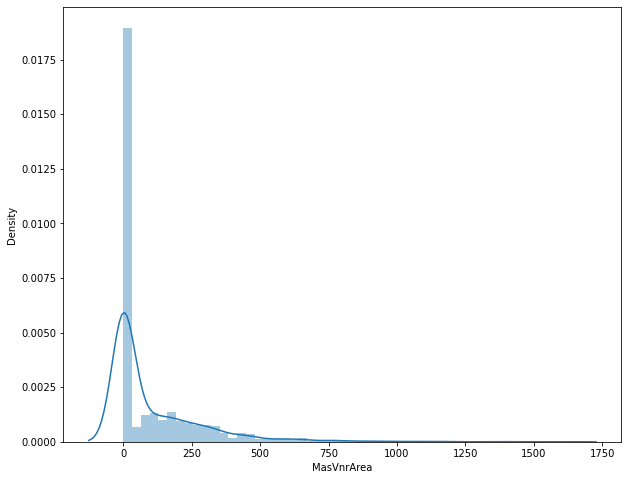

In [202]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(dfn.MasVnrArea)

In [203]:
dfn.MasVnrArea.value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
16.0        7
         ... 
673.0       1
280.0       1
258.0       1
1170.0      1
408.0       1
Name: MasVnrArea, Length: 327, dtype: int64

In [204]:
print('Mean:',dfn.MasVnrArea.mean(),'  Median:', dfn.MasVnrArea.median(),'  Mode:', dfn.MasVnrArea.mode() )

Mean: 103.68526170798899   Median: 0.0   Mode: 0    0.0
dtype: float64


In [205]:
# Data is skewed for MasVnrArea, hence we'll use Mode
dfn = replace_nulls_with_mode(dfn,'MasVnrArea')

In [206]:
dfn['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [207]:
# Replacing missing 1 value with Mode for 'Electrical'
dfn = replace_nulls_with_mode(dfn,'Electrical')

In [208]:
# Saving data without NaNs to a csv file for future reference
dfn.to_csv(r'C:\temp\dfn_no_nulls.csv')

In [209]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [210]:
dfn.shape

(1460, 77)

In [211]:
# Now let's convert all categorial columns to numerical columns and drop the original columns
# Here we'll make a new DataFrame
dfnn = dfn
for i in dfnn.columns:
    if (object==dfnn[i].dtype):
        dfnn = categorical_to_numerical(dfnn,dfnn[i].name)

In [212]:
dfnn.shape

(1460, 248)

In [213]:
#plt.figure(figsize=(30,30))
#sns.heatmap(dfnn.corr(),cmap='flare',annot=True)
#plt.show()

In [214]:
# Separate train data from the consolidated data
X = dfnn.drop(dfnn[pd.isna(dfnn.SalePrice)].index)
y = X['SalePrice']
X = X.drop(['SalePrice','Id'], axis=1)
#dfn_train.drop(['Id'], axis=1, inplace=True)

In [215]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()                # Instantiate the object
# X_scaled = scaler.fit_transform(X)       # It will apply the formula and transform data
# Standardization is applied to features not the label.
# X contains only the features data and not the label

In [216]:
# df_scaled = pd.DataFrame(X_scaled)

In [217]:
# Function to get highly corelated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [218]:
# Here we want to list all the columns that have corelation more than 60%
corr_features = correlation(X, 0.6)
corr_features

{'1Story',
 '1stFlrSF',
 '2Story',
 'Brk Cmn',
 'BrkFace',
 'BsmtFullBath',
 'CmentBd',
 'Detchd',
 'Duplex',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GasW',
 'Gd',
 'GrLivArea',
 'HdBoard',
 'Hip',
 'MetalSd',
 'Mix',
 'NA',
 'None',
 'Norm',
 'Normal',
 'PConc',
 'Partial',
 'Plywood',
 'Po',
 'RM',
 'Shed',
 'Somerst',
 'Stucco',
 'TA',
 'Tar&Grv',
 'TotRmsAbvGrd',
 'Unf',
 'VinylSd',
 'WD',
 'Wd Sdng'}

In [219]:
X1 = X.drop(corr_features, axis=1)

In [220]:
X1.shape

(1168, 165)

In [221]:
# Lets for the time being split data in train and test from within the training data
from sklearn.model_selection import train_test_split

#X = dfn_train.drop(['SalePrice'], axis=1)
#y = dfn_train['SalePrice']
X_train, X_test, rdkin, y_test= train_test_split(X1, y, test_size=0.20, random_state=35) 

In [222]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()     # instantiate the linear regression object
linear_reg.fit(X_train, y_train)    # train the model for testing only

LinearRegression()

In [223]:
linear_reg.score(X_train, y_train)

0.8941285242551542

In [224]:
linear_reg.score(X_test, y_test)

0.5876924835342399

In [225]:
# Now training model on the full training data
linear_reg.fit(X1, y)

LinearRegression()

In [226]:
# Finding score on the partial Training data
linear_reg.score(X_train, y_train)

0.8760207735272164

In [228]:
# Finding score on the test data created from within the Train data
linear_reg.score(X_test, y_test)

0.823141538871845

In [229]:
# Now let's extract the actual test data from within the consolidated data
X_test_full = dfnn.drop(dfnn[pd.notna(dfnn.SalePrice)].index)
X_test_full = X_test_full.drop(['SalePrice','Id'], axis=1)

In [230]:
X_test_full.shape

(292, 246)

In [231]:
# Remove the columns removed in the training data
X_test_full = X_test_full.drop(corr_features, axis=1)

In [232]:
X_test_full.shape

(292, 165)

#### Now its ok for the prediction

In [233]:
y_test_full = linear_reg.predict(X_test_full)

In [237]:
X_test_full['Prediction_Sale_Price'] = y_test_full

In [239]:
X_test_full.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Con,ConLD,ConLI,ConLw,New,Oth,AdjLand,Alloca,Family,Prediction_Sale_Price
1168,20,86.0,14157,9,5,2005,2006,200.0,1249,0,...,0,0,0,0,0,0,0,0,0,360454.515700
1169,120,60.0,5814,8,5,1984,1984,0.0,1036,0,...,0,0,0,0,0,0,0,0,0,259779.212801
1170,20,60.0,11838,8,5,2001,2001,0.0,0,0,...,0,0,0,0,0,0,0,0,0,233601.779879
1171,70,75.0,12000,7,7,1941,1950,0.0,275,0,...,0,0,0,0,0,0,0,0,0,171672.925578
1172,60,86.0,14598,6,5,2007,2007,74.0,0,0,...,0,0,0,0,0,0,0,0,0,231764.441071


In [240]:
X_test_full.to_csv(r'C:\temp\prediction_20220317.csv')

In [241]:
import pickle
filename = r'C:\Temp\Housing_Project_RegressModel.pkl'
pickle.dump(linear_reg,open(filename,'wb'))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Con,ConLD,ConLI,ConLw,New,Oth,AdjLand,Alloca,Family,Prediction_Sale_Price
1168,20,86.0,14157,9,5,2005,2006,200.0,1249,0,...,0,0,0,0,0,0,0,0,0,360454.515700
1169,120,60.0,5814,8,5,1984,1984,0.0,1036,0,...,0,0,0,0,0,0,0,0,0,259779.212801
1170,20,60.0,11838,8,5,2001,2001,0.0,0,0,...,0,0,0,0,0,0,0,0,0,233601.779879
1171,70,75.0,12000,7,7,1941,1950,0.0,275,0,...,0,0,0,0,0,0,0,0,0,171672.925578
1172,60,86.0,14598,6,5,2007,2007,74.0,0,0,...,0,0,0,0,0,0,0,0,0,231764.441071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,78.0,10206,8,5,2007,2007,468.0,33,0,...,0,0,0,0,0,0,0,0,0,241601.332149
1456,20,57.0,9245,5,5,1994,1995,0.0,686,0,...,0,0,0,0,0,0,0,0,0,156112.624427
1457,20,60.0,11241,6,7,1970,1970,180.0,578,0,...,0,0,0,0,0,0,0,0,0,174274.988551
1458,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,0,0,0,0,0,0,0,0,0,178293.723693
